In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/final_data.csv")

In [ ]:
y = pd.read_csv("/content/pha_map.csv")

In [ ]:
X = df.drop(columns=['albedo', 'rot_per', 'e', 'a', 'q', 'om', 'w', 'ma', 'ad'])

In [ ]:
X.isnull().sum()

H           0
diameter    0
i           0
n           0
per         0
moid_ld     0
dtype: int64

In [ ]:
!pip install xgboost

In [ ]:
!pip install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 14.0 MB/s eta 0:00:00


In [ ]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.1 MB/s eta 0:00:00


In [ ]:
import os
os.cpu_count()

2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
# from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay
from imblearn.metrics import sensitivity_specificity_support, classification_report_imbalanced
from imblearn.over_sampling import ADASYN, KMeansSMOTE

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
ad = ADASYN(random_state=42)
X_resampled, y_resampled = ad.fit_resample(X, y)

In [ ]:
X_resampled.shape

(2618891, 6)

In [ ]:
y_resampled.value_counts()

pha
0      1309593
1      1309298
Name: count, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=43)

In [ ]:
y_train.value_counts()

pha
1    1047936
0    1047176
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

pha
0      262417
1      261362
Name: count, dtype: int64

In [ ]:
!pip install dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [ ]:
!python -m pip install dask distributed --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.5 MB/s eta 0:00:00


In [ ]:
import os
os.cpu_count()

96

In [ ]:
from dask.distributed import Client
client = Client(n_workers=32)
client

/usr/local/lib/python3.10/dist-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 36255 instead
  warnings.warn(
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41879
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:36255/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44951'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39775'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:45277'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39581'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46101'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:44679'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34755'
INFO:distributed.nanny:        Start Nanny at:

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:36255/status,
Dashboard: http://127.0.0.1:36255/status,Workers: 32
Total threads: 96,Total memory: 334.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41879,Workers: 32
Dashboard: http://127.0.0.1:36255/status,Total threads: 96
Started: Just now,Total memory: 334.56 GiB
Comm: tcp://127.0.0.1:44873,Total threads: 3
Dashboard: http://127.0.0.1:36087/status,Memory: 10.46 GiB
Nanny: tcp://127.0.0.1:44951,


In [ ]:
import joblib

In [ ]:
y_train = y_train.squeeze()
y_train

2321756    1
54653      0
2110397    1
2387704    1
781072     0
          ..
1106227    0
1525776    1
1439802    1
2484501    1
1613617    1
Name: pha, Length: 2095112, dtype: int64

In [ ]:
rf = RandomForestClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

INFO:distributed.scheduler:Receive client connection: Client-worker-2e3c689c-35db-11ef-a84f-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49204
INFO:distributed.scheduler:Receive client connection: Client-worker-2e3ea988-35db-11ef-a831-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49214
INFO:distributed.scheduler:Receive client connection: Client-worker-2ea10589-35db-11ef-a823-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49218
INFO:distributed.scheduler:Receive client connection: Client-worker-2ea5b577-35db-11ef-a81d-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49228
INFO:distributed.scheduler:Receive client connection: Client-worker-2eaf83e3-35db-11ef-a829-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:49232
INFO:distributed.scheduler:Receive client connection: Client-worker-2eafb5d7-35d

In [ ]:
accuracy_score(y_test,y_pred)

0.9999751803718744

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262404,     13],
       [     0, 261362]])

In [ ]:
from imblearn.metrics import classification_report_imbalanced

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262417
          1       1.00      1.00      1.00      1.00      1.00      1.00    261362

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523779



In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99995046, 1.        ]), array([1.        , 0.99995046]), array([262417, 261362]))


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 20, 30, 50]
}

rand = RandomizedSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand.fit(X_train,y_train)

INFO:distributed.scheduler:Receive client connection: Client-worker-39608523-35e1-11ef-a7bf-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35322
INFO:distributed.scheduler:Receive client connection: Client-worker-39639109-35e1-11ef-a7ec-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35336
INFO:distributed.scheduler:Receive client connection: Client-worker-396172e4-35e1-11ef-a798-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35324
INFO:distributed.scheduler:Receive client connection: Client-worker-39643fff-35e1-11ef-a7f0-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35350
INFO:distributed.scheduler:Receive client connection: Client-worker-3965ecea-35e1-11ef-a7d1-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:35364
INFO:distributed.scheduler:Receive client connection: Client-worker-396771f2-35e

In [ ]:
rand.best_params_

{'n_estimators': 200, 'max_depth': 30}

In [ ]:
rand.best_score_

0.9999670661945625

In [ ]:
##Training with best parameters
rfbest = RandomForestClassifier(n_estimators= 200, max_depth= 30)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rfbest.fit(X_train,y_train)

In [ ]:
y_pred = rfbest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262417
          1       1.00      1.00      1.00      1.00      1.00      1.00    261362

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523779



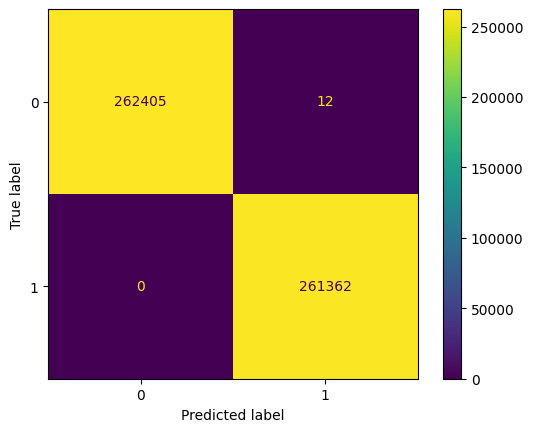

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=rfbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rfbest.classes_)
disp.plot()
plt.show()

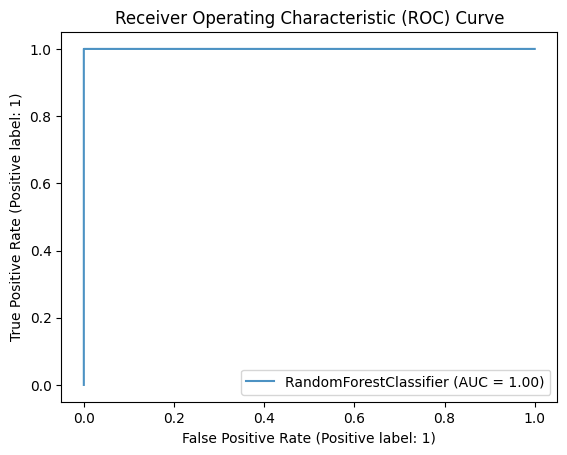

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(rfbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999771356276461, 0.9999771356276461, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999770895740379, 0.9999770895740379, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999770895740379, 0.9999771816812543, None)


# Training with XGBoost

In [ ]:
xgb = XGBClassifier()
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    xgb.fit(X_train,y_train)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9999369963286042

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262384,     33],
       [     0, 261362]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.9999371229760268

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgb = XGBClassifier()
param_grid = {
    'objective' : [None, 'binary:logistic', 'binary:hinge'],
    'max_depth': [None, 20, 30, 50],
    'eta' : [0.0001, 0.001, 0.01, 0.1, 1],
    'tree_method' : ['auto', 'exact']
}

rand2 = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand2.fit(X_train,y_train)

In [ ]:
rand2.best_params_

{'tree_method': 'exact',
 'objective': 'binary:logistic',
 'max_depth': 50,
 'eta': 1}

In [ ]:
rand2.best_score_

0.9999680207960999

In [ ]:
##Training with best parameters
xgbest = XGBClassifier(tree_method='exact',
 objective= 'binary:logistic',
 max_depth=50,
 eta=1)
xgbest.fit(X_train,y_train)
y_pred = xgbest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262417
          1       1.00      1.00      1.00      1.00      1.00      1.00    261362

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523779



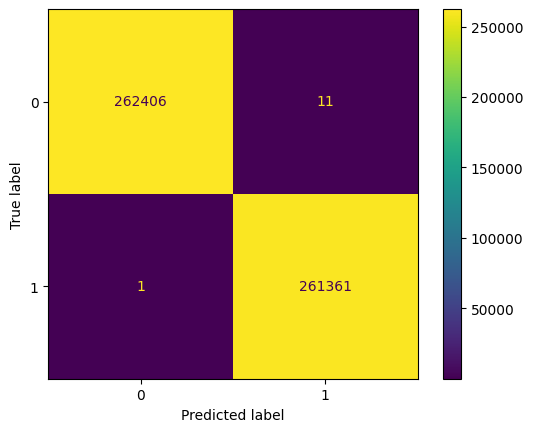

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=xgbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgbest.classes_)
disp.plot()
plt.show()

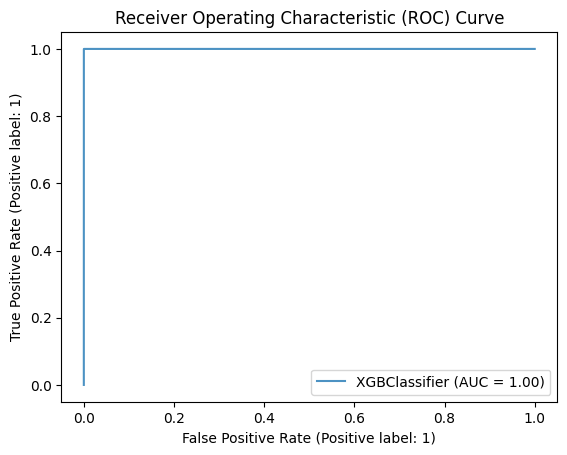

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(xgbest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99995808, 0.99999617]), array([0.99999617, 0.99995808]), array([262417, 261362]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999771279365532, 0.9999771279365532, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999770895740379, 0.9999770895740379, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999770895740379, 0.9999771662990686, None)


# Training with AdaBoost

In [ ]:
abc = AdaBoostClassifier()
abc.fit(X_train,y_train)
y_pred = abc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.99989117547668

In [ ]:
confusion_matrix(y_test,y_pred)

array([[262361,     56],
       [     1, 261361]])

In [ ]:
roc_auc_score(y_test,y_pred)

0.999891386540226

In [ ]:
abc = AdaBoostClassifier()
param_grid = {
    'n_estimators' : [100, 200, 300, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
}

rand5 = RandomizedSearchCV(abc, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    rand5.fit(X_train,y_train)

INFO:distributed.scheduler:Receive client connection: Client-worker-3199bfe2-39bc-11ef-b591-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42720
INFO:distributed.scheduler:Receive client connection: Client-worker-319bbed2-39bc-11ef-b5aa-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42736
INFO:distributed.scheduler:Receive client connection: Client-worker-31af514a-39bc-11ef-b5cc-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42740
INFO:distributed.scheduler:Receive client connection: Client-worker-31af6596-39bc-11ef-b574-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42750
INFO:distributed.scheduler:Receive client connection: Client-worker-31af247d-39bc-11ef-b5b1-0242ac1c000c
INFO:distributed.core:Starting established connection to tcp://127.0.0.1:42764
INFO:distributed.scheduler:Receive client connection: Client-worker-31b1aa70-39b

In [ ]:
rand5.best_params_

{'n_estimators': 300, 'learning_rate': 1}

In [ ]:
rand5.best_score_

0.9999422465181397

In [ ]:
##Training with best parameters
adabest = AdaBoostClassifier(n_estimators=300, learning_rate=1)
with joblib.parallel_backend("dask", scatter=[X_train,y_train]):
    adabest.fit(X_train,y_train)

y_pred = adabest.predict(X_test)

In [ ]:
print(classification_report_imbalanced(y_test,y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      1.00      1.00      1.00      1.00    262417
          1       1.00      1.00      1.00      1.00      1.00      1.00    261362

avg / total       1.00      1.00      1.00      1.00      1.00      1.00    523779



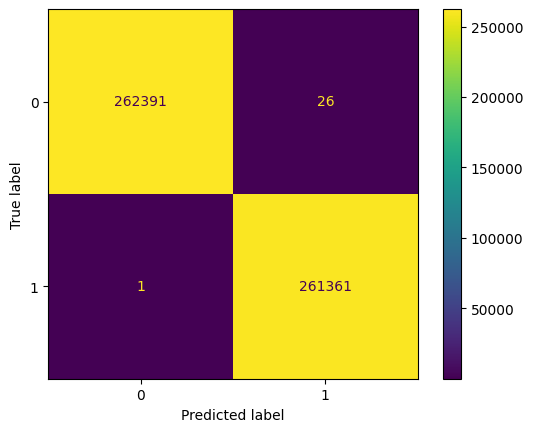

In [ ]:
##Plotting Confusion matrix

cm = confusion_matrix(y_test, y_pred, labels=adabest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=adabest.classes_)
disp.plot()
plt.show()

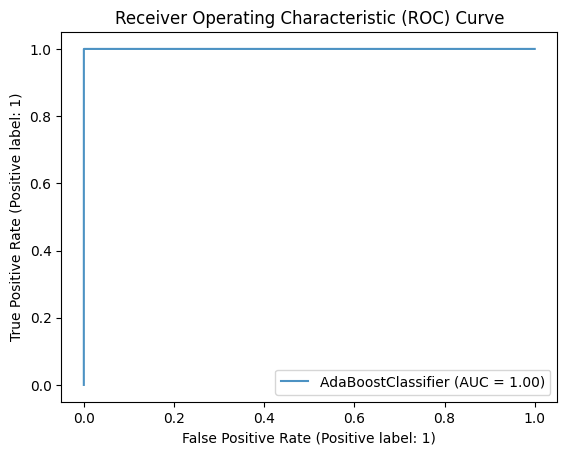

In [ ]:
##Plotting ROC Curve

ax = plt.gca()
roc_display = RocCurveDisplay.from_estimator(adabest, X_test, y_test, ax=ax, alpha=0.8)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [ ]:
print(sensitivity_specificity_support(y_test, y_pred))

(array([0.99990092, 0.99999617]), array([0.99999617, 0.99990092]), array([262417, 261362]))


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='macro'))

(0.9999485474711108, 0.9999485474711108, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='micro'))

(0.9999484515415853, 0.9999484515415853, None)


In [ ]:
print(sensitivity_specificity_support(y_test, y_pred, average='weighted'))

(0.9999484515415853, 0.9999486434006364, None)
